In [159]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [160]:
%matplotlib inline

In [161]:
car_resale_dataset = pd.read_csv("./data/train.csv")
car_resale_test = pd.read_csv("./data/test.csv")
car_resale_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16784 entries, 0 to 16783
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   listing_id         16784 non-null  int64  
 1   title              16784 non-null  object 
 2   make               14624 non-null  object 
 3   model              16784 non-null  object 
 4   description        16439 non-null  object 
 5   manufactured       16590 non-null  float64
 6   original_reg_date  318 non-null    object 
 7   reg_date           16583 non-null  object 
 8   type_of_vehicle    16784 non-null  object 
 9   category           16784 non-null  object 
 10  transmission       16784 non-null  object 
 11  curb_weight        16205 non-null  float64
 12  power              14447 non-null  float64
 13  fuel_type          3490 non-null   object 
 14  engine_cap         16731 non-null  float64
 15  no_of_owners       16608 non-null  float64
 16  depreciation       163

In [162]:
car_resale_dataset.head()

,listing_id,title,make,model,description,manufactured,original_reg_date,reg_date,type_of_vehicle,category,...,mileage,omv,arf,opc_scheme,lifespan,eco_category,features,accessories,indicative_price,price
0,1030324,BMW 3 Series 320i Gran Turismo M-Sport,bmw,320i,1 owner! 320i gt m-sports model! big brake kit...,2013.0,NaN,09-dec-2013,luxury sedan,"parf car, premium ad car, low mileage car",...,73000.0,45330.0,50462.0,NaN,NaN,uncategorized,"5 doors gt, powerful and fuel efficient 2.0l t...","bmw i-drive, navigation, bluetooth/aux/usb inp...",NaN,71300.0
1,1021510,Toyota Hiace 3.0M,NaN,hiace,high loan available! low mileage unit. wear an...,2014.0,NaN,26-jan-2015,van,premium ad car,...,110112.0,27502.0,1376.0,NaN,25-jan-2035,uncategorized,low mileage unit. well maintained vehicle. vie...,factory radio setting. front recording camera....,NaN,43800.0
2,1026909,Mercedes-Benz CLA-Class CLA180,mercedes-benz,cla180,1 owner c&c unit. full agent service with 1 mo...,2016.0,NaN,25-jul-2016,luxury sedan,"parf car, premium ad car",...,80000.0,27886.0,26041.0,NaN,NaN,uncategorized,responsive and fuel efficient 1.6l inline 4 cy...,dual electric/memory seats. factory fitted aud...,NaN,95500.0
3,1019371,Mercedes-Benz E-Class E180 Avantgarde,mercedes-benz,e180,"fully agent maintained, 3 years warranty 10 ye...",2019.0,NaN,17-nov-2020,luxury sedan,"parf car, almost new car, consignment car",...,9800.0,46412.0,56977.0,NaN,NaN,uncategorized,"1.5l inline-4 twin scroll turbocharged engine,...",64 colour ambient lighting. active parking ass...,NaN,197900.0
4,1031014,Honda Civic 1.6A VTi,NaN,civic,"kah motor unit! 1 owner, lowest 1.98% for full...",2019.0,NaN,20-sep-2019,mid-sized sedan,parf car,...,40000.0,20072.0,20101.0,NaN,NaN,uncategorized,"1.6l i-vtec engine, 123 bhp, earth dreams cvt ...","s/rims, premium leather seats, factory touch s...",NaN,103200.0


In [163]:
car_resale_dataset.price.describe()

count    1.678400e+04
mean     1.129102e+05
std      1.342478e+05
min      2.100000e+03
25%      5.700000e+04
50%      8.010000e+04
75%      1.209250e+05
max      2.920500e+06
Name: price, dtype: float64

/Users/Vincent/anaconda3/envs/d2l/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

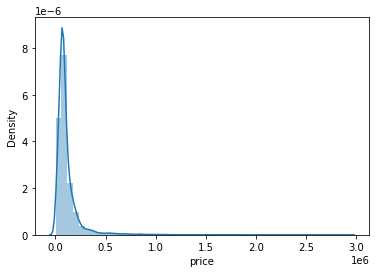

In [164]:
import seaborn as sns
sns.distplot(car_resale_dataset.price)

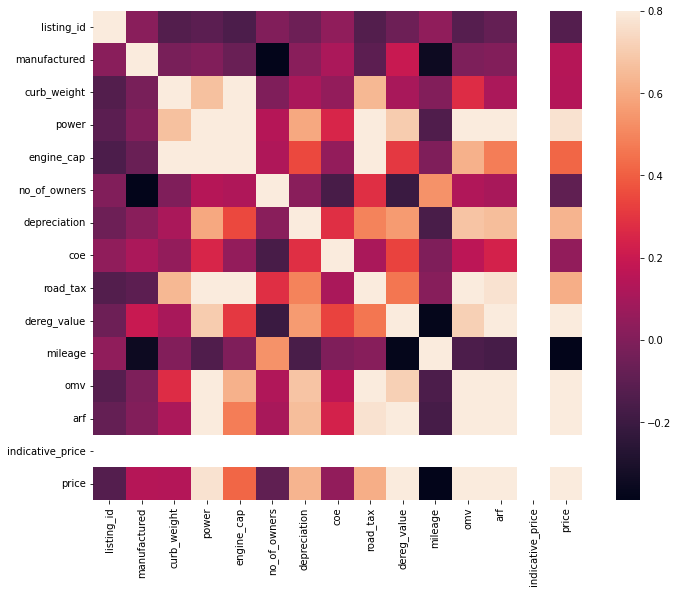

In [165]:
corrmat = car_resale_dataset.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [166]:
car_resale_dataset.make.unique(),car_resale_dataset.make.value_counts()

(array(['bmw', nan, 'mercedes-benz', 'volvo', 'kia', 'honda', 'nissan',
        'toyota', 'mazda', 'ferrari', 'volkswagen', 'jaguar', 'opel',
        'mini', 'suzuki', 'porsche', 'lexus', 'lamborghini', 'audi',
        'proton', 'hyundai', 'bentley', 'citroen', 'maserati',
        'alfa romeo', 'mitsubishi', 'fiat', 'tesla', 'hino', 'skoda',
        'land rover', 'rolls-royce', 'mclaren', 'ssangyong', 'renault',
        'peugeot', 'subaru', 'isuzu', 'infiniti', 'chevrolet', 'dongfeng',
        'cupra', 'ford', 'yutong', 'golden dragon', 'dodge', 'mercedes',
        'seat', 'maxus', 'austin', 'mg', 'morris', 'perodua', 'byd',
        'rover', 'jeep', 'ud', 'aston martin', 'scania', 'international',
        'daf', 'alpine', 'daihatsu', 'lotus', 'hafei', 'chery', 'foton',
        'saab', 'hummer', 'iveco', 'riley', 'daimler', 'ruf', 'higer',
        'chrysler', 'man', 'joylong', 'mitsuoka'], dtype=object),
 toyota           2163
 mercedes-benz    1967
 bmw              1636
 honda        

In [167]:
car_resale_dataset.groupby("make").model.value_counts()

make        model    
alfa romeo  giulia       5
            spider       4
            giulietta    2
            159          1
            a156         1
                        ..
volvo       p1800        1
            s40          1
            v50          1
yutong      zk6100h      1
            zk6938h      1
Name: model, Length: 696, dtype: int64

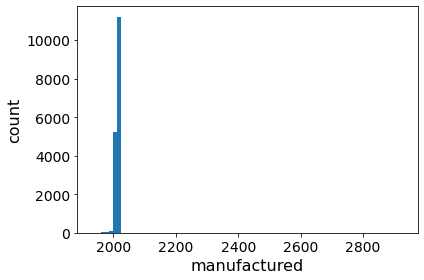

6300    2925.0
Name: manufactured, dtype: float64


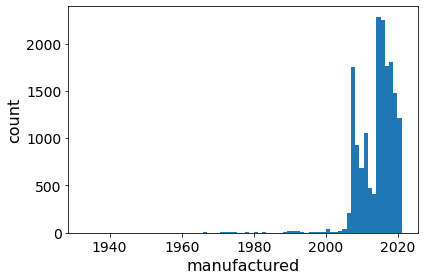

,listing_id,title,make,model,description,manufactured,original_reg_date,reg_date,type_of_vehicle,category,...,mileage,omv,arf,opc_scheme,lifespan,eco_category,features,accessories,indicative_price,price
854,1013834,Ford Tudor 1933 (COE till 08/2029),ford,tudor,"second owner, frame off restoration by us lege...",1933.0,01-jan-1933,26-aug-2009,others,"coe car, direct owner sale, low mileage car, v...",...,88000.0,28726.0,2873.0,NaN,NaN,uncategorized,"ford flathead v8 with twin stromberg carbs, aw...","price reduced, steering wheel, brakes, whoop w...",NaN,96800.0


In [168]:
def draw_column(column, x_label, y_label):
    plt.figure()
    plt.tick_params(labelsize=14)
    plt.hist(column.to_numpy(), bins=75)
    plt.xlabel(x_label, fontsize=16)
    plt.ylabel(y_label, fontsize=16)
    plt.tight_layout()
    plt.show()

draw_column(car_resale_dataset.manufactured, 'manufactured', 'count')
print(car_resale_dataset[car_resale_dataset.manufactured > 2021].manufactured)
car_resale_dataset_cleaned = car_resale_dataset[car_resale_dataset.manufactured <= 2021]
draw_column(car_resale_dataset_cleaned.manufactured, 'manufactured', 'count')
car_resale_dataset_cleaned[car_resale_dataset_cleaned.manufactured == car_resale_dataset_cleaned.manufactured.min()]

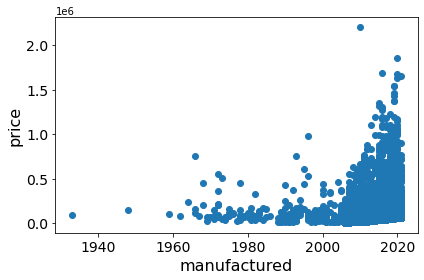

In [169]:
def draw_two_col(X, Y, X_label, Y_label):
    plt.figure()
    plt.tick_params(labelsize=14)
    plt.scatter(X, Y)
    plt.xlabel(X_label, fontsize=16)
    plt.ylabel(Y_label, fontsize=16)
    plt.tight_layout()
    plt.show()

draw_two_col(car_resale_dataset_cleaned.manufactured, car_resale_dataset_cleaned.price, "manufactured", "price")

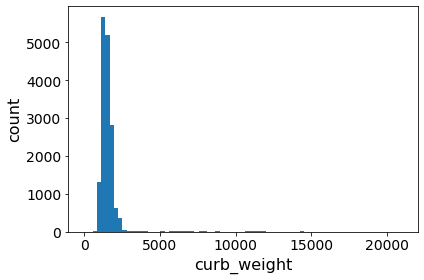

6427    20980.0
Name: curb_weight, dtype: float64
      listing_id                           title    make model  \
6427     1030586  Scania P124 (COE till 10/2025)  scania  p124   

                                description  manufactured original_reg_date  \
6427  left 4 year to use, high scrap value.        2005.0               NaN   

         reg_date type_of_vehicle                    category  ... mileage  \
6427  13-oct-2005           truck  coe car, direct owner sale  ...     NaN   

           omv     arf opc_scheme     lifespan   eco_category  features  \
6427  119320.0  5966.0        NaN  12-oct-2025  uncategorized       NaN   

      accessories  indicative_price     price  
6427          NaN               NaN  149500.0  

[1 rows x 30 columns]


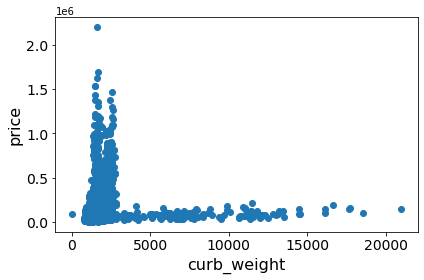

In [170]:
draw_column(car_resale_dataset_cleaned.curb_weight, 'curb_weight', 'count')
print(car_resale_dataset_cleaned[car_resale_dataset_cleaned.curb_weight == car_resale_dataset_cleaned.curb_weight.max()].curb_weight)
print(car_resale_dataset_cleaned[car_resale_dataset_cleaned.curb_weight == car_resale_dataset_cleaned.curb_weight.max()])
draw_two_col(car_resale_dataset_cleaned.curb_weight, car_resale_dataset_cleaned.price, "curb_weight", "price")

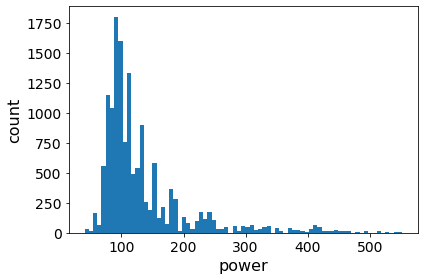

1433     552.0
4818     552.0
11865    552.0
Name: power, dtype: float64


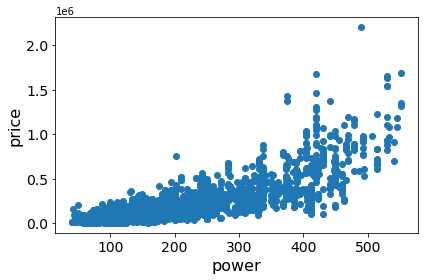

In [171]:
draw_column(car_resale_dataset_cleaned.power, 'power', 'count')
print(car_resale_dataset_cleaned[car_resale_dataset_cleaned.power == car_resale_dataset_cleaned.power.max()].power)
draw_two_col(car_resale_dataset_cleaned.power, car_resale_dataset_cleaned.price, "power", "price")

In [172]:
car_resale_dataset.type_of_vehicle.value_counts()

suv                3104
luxury sedan       3059
mid-sized sedan    2634
sports car         2024
hatchback          1828
mpv                1821
van                1076
truck               751
stationwagon        352
bus/mini bus        107
others               28
Name: type_of_vehicle, dtype: int64

In [173]:
car_resale_dataset.category.head()

0    parf car, premium ad car, low mileage car
1                               premium ad car
2                     parf car, premium ad car
3    parf car, almost new car, consignment car
4                                     parf car
Name: category, dtype: object

In [174]:
car_resale_dataset.transmission.value_counts()

auto      15121
manual     1663
Name: transmission, dtype: int64

In [175]:
car_resale_dataset.fuel_type.value_counts()

diesel             2088
petrol-electric    1041
petrol              308
electric             53
Name: fuel_type, dtype: int64

In [176]:
car_resale_dataset_cleaned.groupby(["fuel_type"]).price.mean()

fuel_type
diesel              71372.015466
electric           195084.000000
petrol              59645.454545
petrol-electric    135492.193676
Name: price, dtype: float64

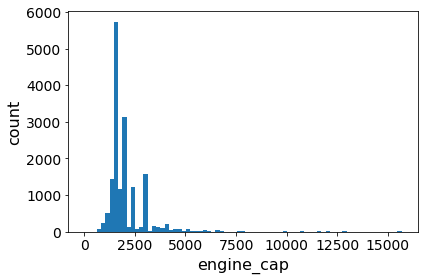

767      15681.0
1334     15681.0
1391     15681.0
1663     15681.0
3448     15681.0
3984     15681.0
4015     15681.0
6155     15681.0
6674     15681.0
8954     15681.0
10742    15681.0
12003    15681.0
12967    15681.0
13154    15681.0
13702    15681.0
14825    15681.0
15310    15681.0
15996    15681.0
Name: engine_cap, dtype: float64


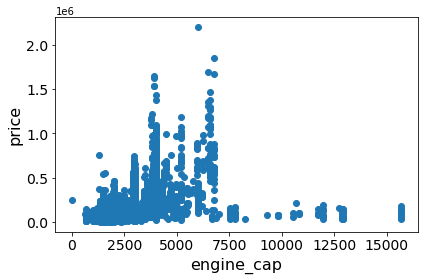

In [177]:
draw_column(car_resale_dataset_cleaned.engine_cap, 'engine_cap', 'count')
print(car_resale_dataset_cleaned[car_resale_dataset_cleaned.engine_cap == car_resale_dataset_cleaned.engine_cap.max()].engine_cap)
draw_two_col(car_resale_dataset_cleaned.engine_cap, car_resale_dataset_cleaned.price, "engine_cap", "price")

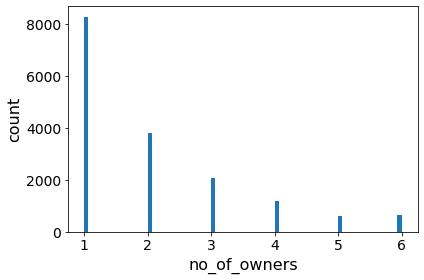

45       6.0
46       6.0
54       6.0
99       6.0
103      6.0
        ... 
16740    6.0
16743    6.0
16753    6.0
16760    6.0
16762    6.0
Name: no_of_owners, Length: 638, dtype: float64


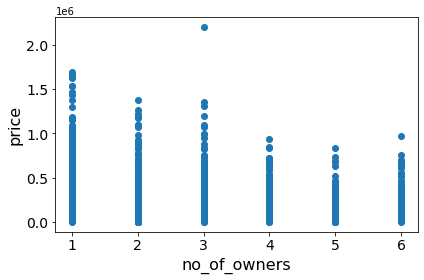

2200000.0


In [178]:
draw_column(car_resale_dataset_cleaned.no_of_owners, 'no_of_owners', 'count')
print(car_resale_dataset_cleaned[car_resale_dataset_cleaned.no_of_owners == car_resale_dataset_cleaned.no_of_owners.max()].no_of_owners)
draw_two_col(car_resale_dataset_cleaned.no_of_owners, car_resale_dataset_cleaned.price, "no_of_owners", "price")
print(car_resale_dataset_cleaned[car_resale_dataset_cleaned.no_of_owners == 3 ].price.max())

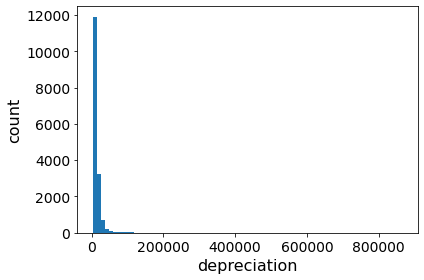

       depreciation     price       omv      coe
1550        68030.0   48200.0   82257.0  26004.0
2934       393610.0  317700.0  116055.0  82003.0
6789        39120.0   36100.0   73605.0  18757.0
7257        28390.0   18500.0   24285.0  24394.0
7566        39120.0   36100.0   73956.0  18757.0
8996        29480.0   26000.0       NaN   6022.0
9480        53560.0   42800.0   96951.0  26246.0
9795       662740.0  658900.0  370031.0  80101.0
10710      157010.0  115600.0   49335.0  73801.0
11365      117110.0   66000.0       NaN   7174.0
11604       21080.0   20800.0   24590.0  17035.0
11710       43440.0   26200.0   32688.0  24394.0
12352       20210.0   18200.0   24285.0  18757.0
12451       28430.0   27500.0   68291.0  17035.0
13839      865610.0  682000.0  319840.0  73890.0
14919      448890.0  335500.0  207408.0  74513.0


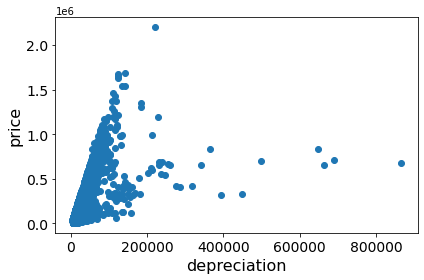

In [179]:
draw_column(car_resale_dataset_cleaned.depreciation, 'depreciation', 'count')
print(car_resale_dataset_cleaned[(car_resale_dataset_cleaned.depreciation > car_resale_dataset_cleaned.coe) & (car_resale_dataset_cleaned.depreciation > car_resale_dataset_cleaned.price)][["depreciation","price","omv", "coe"]])
draw_two_col(car_resale_dataset_cleaned.depreciation, car_resale_dataset_cleaned.price, "depreciation", "price")

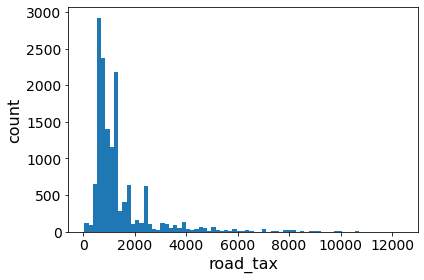

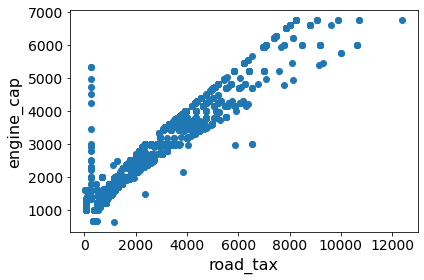

,engine_cap,road_tax
1636,1591.0,50.0
2523,1591.0,50.0
13806,1591.0,50.0


In [180]:
draw_column(car_resale_dataset_cleaned.road_tax, 'road_tax', 'count')
draw_two_col(car_resale_dataset_cleaned.road_tax, car_resale_dataset_cleaned.engine_cap, "road_tax", "engine_cap")
car_resale_dataset_cleaned[car_resale_dataset_cleaned.engine_cap > 20 * car_resale_dataset_cleaned.road_tax][["engine_cap", "road_tax"]]

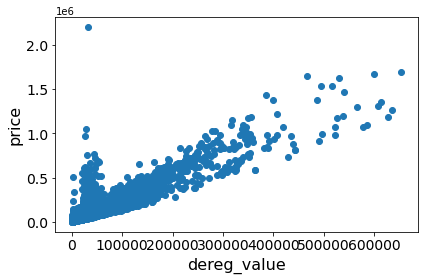

In [181]:
draw_two_col(car_resale_dataset_cleaned.dereg_value, car_resale_dataset_cleaned.price, "dereg_value", "price")

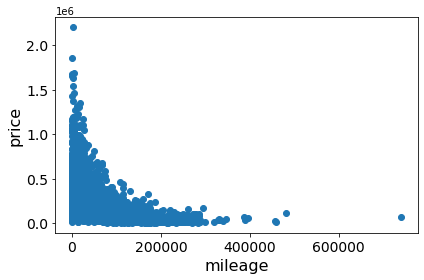

740459.0

In [182]:
draw_two_col(car_resale_dataset_cleaned.mileage, car_resale_dataset_cleaned.price, "mileage", "price")
car_resale_dataset_cleaned.mileage.max()

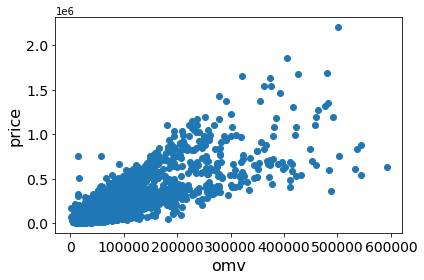

In [183]:
draw_two_col(car_resale_dataset_cleaned.omv, car_resale_dataset_cleaned.price, "omv", "price")

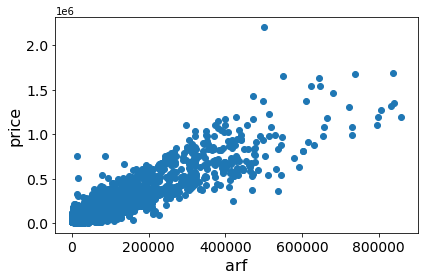

In [184]:
draw_two_col(car_resale_dataset_cleaned.arf, car_resale_dataset_cleaned.price, "arf", "price")

In [185]:
car_resale_dataset_cleaned.eco_category.value_counts()

uncategorized    16589
Name: eco_category, dtype: int64

In [186]:
selected_features = ["make","model","manufactured","reg_date","type_of_vehicle","category","transmission","curb_weight","power","fuel_type",
                     "engine_cap","no_of_owners","depreciation","coe","road_tax","dereg_value","mileage","omv","arf"]
car_resale_dataset_selected = car_resale_dataset_cleaned[selected_features]
car_resale_test_selected = car_resale_test[selected_features]
car_resale_price = car_resale_dataset_cleaned["price"]
car_resale_dataset_selected.shape
car_resale_dataset_selected.info()
car_resale_dataset_selected.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16589 entries, 0 to 16783
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make             14467 non-null  object 
 1   model            16589 non-null  object 
 2   manufactured     16589 non-null  float64
 3   reg_date         16574 non-null  object 
 4   type_of_vehicle  16589 non-null  object 
 5   category         16589 non-null  object 
 6   transmission     16589 non-null  object 
 7   curb_weight      16200 non-null  float64
 8   power            14410 non-null  float64
 9   fuel_type        3439 non-null   object 
 10  engine_cap       16539 non-null  float64
 11  no_of_owners     16572 non-null  float64
 12  depreciation     16344 non-null  float64
 13  coe              15702 non-null  float64
 14  road_tax         14472 non-null  float64
 15  dereg_value      15590 non-null  float64
 16  mileage          12935 non-null  float64
 17  omv         

,manufactured,curb_weight,power,engine_cap,no_of_owners,depreciation,coe,road_tax,dereg_value,mileage,omv,arf
count,16589.000000,16200.000000,14410.000000,16539.000000,16572.000000,16344.000000,15702.000000,14472.000000,15590.000000,12935.000000,16553.000000,16494.000000
mean,2014.157514,1554.550926,133.668078,2075.391559,2.035421,14484.371635,41823.619921,1341.512369,44184.926042,73207.974874,38194.146922,38619.728507
std,5.189799,820.521788,73.930180,1118.392226,1.362980,19369.382210,16026.840203,1162.448086,42796.367937,50757.249439,42005.805292,59742.614184
min,1933.000000,2.000000,40.500000,0.000000,1.000000,2680.000000,10.000000,50.000000,97.000000,1.000000,1931.000000,63.000000
25%,2011.000000,1280.000000,90.000000,1497.000000,1.000000,8630.000000,31803.000000,684.000000,24980.500000,33906.500000,19134.000000,12612.750000
50%,2016.000000,1440.000000,110.000000,1796.000000,2.000000,10610.000000,40714.000000,974.000000,35552.000000,66000.000000,26950.000000,21693.500000
75%,2018.000000,1680.000000,147.000000,2354.000000,3.000000,14870.000000,51765.000000,1361.000000,50387.750000,105000.000000,39917.000000,42637.250000
max,2021.000000,20980.000000,552.000000,15681.000000,6.000000,865610.000000,97889.000000,12375.000000,653862.000000,740459.000000,592131.000000,858230.000000


In [187]:
numerical_features = ["manufactured","curb_weight","power","engine_cap","no_of_owners","depreciation","coe","road_tax","dereg_value","mileage","omv","arf"]

date_features = ["reg_date"]
car_resale_dataset_selected_cleaned = car_resale_dataset_selected.copy()
print(car_resale_dataset_selected_cleaned.isnull().sum())
car_resale_dataset_selected_cleaned[numerical_features] = car_resale_dataset_selected_cleaned[numerical_features].fillna(car_resale_dataset_selected_cleaned[numerical_features].mean())
car_resale_dataset_selected_cleaned[numerical_features] = car_resale_dataset_selected_cleaned[numerical_features].apply(lambda x: (x - x.mean()) / (x.std()))
car_resale_dataset_selected_cleaned.reg_date = pd.to_datetime(car_resale_dataset_selected_cleaned.reg_date)
car_resale_dataset_selected_cleaned.reg_date = car_resale_dataset_selected_cleaned.reg_date.apply(lambda x: float(x.year))
car_resale_dataset_selected_cleaned[date_features] = car_resale_dataset_selected_cleaned[date_features].fillna(car_resale_dataset_selected_cleaned[date_features].mean())
car_resale_dataset_selected_cleaned[date_features] = car_resale_dataset_selected_cleaned[date_features].apply(lambda x: (x - x.mean()) / (x.std()))
print(car_resale_dataset_selected_cleaned.info())
car_resale_dataset_selected_cleaned.describe()

make                2122
model                  0
manufactured           0
reg_date              15
type_of_vehicle        0
category               0
transmission           0
curb_weight          389
power               2179
fuel_type          13150
engine_cap            50
no_of_owners          17
depreciation         245
coe                  887
road_tax            2117
dereg_value          999
mileage             3654
omv                   36
arf                   95
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16589 entries, 0 to 16783
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make             14467 non-null  object 
 1   model            16589 non-null  object 
 2   manufactured     16589 non-null  float64
 3   reg_date         16589 non-null  float64
 4   type_of_vehicle  16589 non-null  object 
 5   category         16589 non-null  object 
 6   transmission     16589 non-nul

,manufactured,reg_date,curb_weight,power,engine_cap,no_of_owners,depreciation,coe,road_tax,dereg_value,mileage,omv,arf
count,1.658900e+04,1.658900e+04,1.658900e+04,1.658900e+04,1.658900e+04,1.658900e+04,1.658900e+04,1.658900e+04,1.658900e+04,1.658900e+04,1.658900e+04,1.658900e+04,1.658900e+04
mean,3.020203e-15,3.158444e-14,7.003058e-17,-1.138265e-16,-4.185773e-16,-1.956894e-17,8.619973e-18,7.832932e-17,1.881403e-16,-2.111626e-16,1.957965e-16,-7.174387e-17,8.031030e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.563789e+01,-9.318950e+00,-1.914735e+00,-1.352152e+00,-1.858495e+00,-7.600638e-01,-6.139857e-01,-2.681657e+00,-1.189523e+00,-1.062675e+00,-1.633371e+00,-8.642272e-01,-6.472367e-01
25%,-6.084078e-01,-7.449139e-01,-3.385990e-01,-6.047304e-01,-5.179446e-01,-7.600638e-01,-3.034656e-01,-6.222637e-01,-5.558535e-01,-4.444435e-01,-6.516793e-01,-4.539575e-01,-4.359940e-01
50%,3.550207e-01,2.758046e-01,-1.289409e-01,-2.709305e-01,-2.501927e-01,-2.600137e-02,-1.978784e-01,0.000000e+00,-1.358634e-01,-1.772075e-01,3.246779e-16,-2.670899e-01,-2.811543e-01
75%,7.403921e-01,6.840920e-01,1.547142e-01,1.933024e-02,2.494914e-01,7.080611e-01,1.381624e-02,5.953122e-01,2.094182e-16,1.122038e-01,3.969702e-01,3.858068e-02,6.473372e-02
max,1.318449e+00,1.500667e+00,2.395708e+01,6.071267e+00,1.218370e+01,2.910249e+00,4.426995e+01,3.595673e+00,1.016218e+01,1.469538e+01,1.488750e+01,1.320148e+01,1.375848e+01


In [188]:
print(car_resale_dataset_selected_cleaned.isnull().sum())

make                2122
model                  0
manufactured           0
reg_date               0
type_of_vehicle        0
category               0
transmission           0
curb_weight            0
power                  0
fuel_type          13150
engine_cap             0
no_of_owners           0
depreciation           0
coe                    0
road_tax               0
dereg_value            0
mileage                0
omv                    0
arf                    0
dtype: int64


In [189]:
numerical_features = ["manufactured","curb_weight","power","engine_cap","no_of_owners","depreciation","coe","road_tax","dereg_value","mileage","omv","arf","reg_date"]
other_features = [item for item in selected_features if item not in numerical_features]
other_features

['make', 'model', 'type_of_vehicle', 'category', 'transmission', 'fuel_type']

In [190]:
categorys = car_resale_dataset_selected_cleaned["category"].str.split(pat=",", expand=True)
categorys.rename(columns={0:'c1',1:'c2',2:'c3',3:'c4',4:'c5',5:'c6'},inplace=True)

car_resale_dataset_selected_cleaned_concat = pd.concat([car_resale_dataset_selected_cleaned,categorys],axis=1)
final_selected_features =  ["make","manufactured","reg_date","type_of_vehicle","transmission","curb_weight","power",
                     "engine_cap","depreciation","coe","road_tax","dereg_value","omv","arf", "c1"]
car_resale_dataset_final_selected = car_resale_dataset_selected_cleaned_concat[final_selected_features]
print(car_resale_dataset_final_selected.isnull().sum())
# car_resale_dataset_final_selected = car_resale_dataset_final_selected.fillna("unknow")

make               2122
manufactured          0
reg_date              0
type_of_vehicle       0
transmission          0
curb_weight           0
power                 0
engine_cap            0
depreciation          0
coe                   0
road_tax              0
dereg_value           0
omv                   0
arf                   0
c1                    0
dtype: int64


In [191]:
numerical_features = ["manufactured","curb_weight","power","engine_cap","no_of_owners","depreciation","coe","road_tax","dereg_value","mileage","omv","arf"]
car_resale_test_cleaned = car_resale_test_selected.copy()
car_resale_test_cleaned[numerical_features] = car_resale_test_cleaned[numerical_features].fillna(car_resale_test_cleaned[numerical_features].mean())
car_resale_test_cleaned[numerical_features] = car_resale_test_cleaned[numerical_features].apply(lambda x: (x - x.mean()) / (x.std()))
car_resale_test_cleaned.reg_date = pd.to_datetime(car_resale_test_cleaned.reg_date)
car_resale_test_cleaned.reg_date = car_resale_test_cleaned.reg_date.apply(lambda x: float(x.year))
car_resale_test_cleaned[date_features] = car_resale_test_cleaned[date_features].fillna(car_resale_test_cleaned[date_features].mean())
car_resale_test_cleaned[date_features] = car_resale_test_cleaned[date_features].apply(lambda x: (x - x.mean()) / (x.std()))
print(car_resale_test_cleaned.info())
car_resale_test_cleaned.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make             4373 non-null   object 
 1   model            5000 non-null   object 
 2   manufactured     5000 non-null   float64
 3   reg_date         5000 non-null   float64
 4   type_of_vehicle  5000 non-null   object 
 5   category         5000 non-null   object 
 6   transmission     5000 non-null   object 
 7   curb_weight      5000 non-null   float64
 8   power            5000 non-null   float64
 9   fuel_type        1051 non-null   object 
 10  engine_cap       5000 non-null   float64
 11  no_of_owners     5000 non-null   float64
 12  depreciation     5000 non-null   float64
 13  coe              5000 non-null   float64
 14  road_tax         5000 non-null   float64
 15  dereg_value      5000 non-null   float64
 16  mileage          5000 non-null   float64
 17  omv           

,manufactured,reg_date,curb_weight,power,engine_cap,no_of_owners,depreciation,coe,road_tax,dereg_value,mileage,omv,arf
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,7.208314e-14,2.206804e-14,1.804779e-16,6.110668e-17,4.348522e-16,-4.618528e-17,-8.171241e-17,1.165290e-16,-8.739676e-17,-1.328715e-16,-2.060574e-17,1.904255e-16,3.694822e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.165731e+01,-1.235469e+01,-1.047957e+00,-1.403031e+00,-1.333470e+00,-7.713938e-01,-5.712852e-01,-2.575012e+00,-1.196801e+00,-1.051580e+00,-1.643926e+00,-8.407136e-01,-6.446559e-01
25%,-5.805223e-01,-7.257579e-01,-3.563976e-01,-6.075351e-01,-5.098854e-01,-7.713938e-01,-2.918427e-01,-5.917153e-01,-5.668716e-01,-4.446078e-01,-6.347052e-01,-4.530604e-01,-4.270364e-01
50%,3.581889e-01,2.767363e-01,-1.281157e-01,-2.687128e-01,-2.448135e-01,-2.796866e-02,-1.891591e-01,0.000000e+00,-1.368598e-01,-1.629070e-01,0.000000e+00,-2.633596e-01,-2.636137e-01
75%,7.336734e-01,6.777339e-01,1.673079e-01,2.591529e-02,1.115708e-01,7.154564e-01,4.586021e-03,5.929927e-01,0.000000e+00,1.141089e-01,3.970800e-01,4.134027e-02,5.571975e-02
max,1.296900e+00,1.279230e+00,1.615375e+01,8.864758e+00,1.206374e+01,2.945732e+00,4.034686e+01,3.493230e+00,8.078629e+00,1.794399e+01,1.177689e+01,1.688632e+01,1.785014e+01


In [192]:
test_categorys = car_resale_test_cleaned["category"].str.split(pat=",", expand=True)
test_categorys.rename(columns={0:'c1',1:'c2',2:'c3',3:'c4',4:'c5',5:'c6'},inplace=True) 
car_resale_test_concat = pd.concat([car_resale_test_cleaned,test_categorys],axis=1)
car_resale_test_concat.head()

,make,model,manufactured,reg_date,type_of_vehicle,category,transmission,curb_weight,power,fuel_type,...,dereg_value,mileage,omv,arf,c1,c2,c3,c4,c5,c6
0,bmw,x6,-0.392780,-0.525259,suv,coe car,auto,0.697728,1.351742,NaN,...,-1.757050e-16,1.092413,0.742665,0.532496,coe car,None,None,None,None,None
1,porsche,911,-0.768264,-0.926257,sports car,"coe car, direct owner sale",auto,-0.027403,2.206163,NaN,...,-4.997333e-01,1.159704,1.856733,1.324850,coe car,direct owner sale,None,None,None,None
2,porsche,macan,0.358189,0.477235,suv,"parf car, premium ad car",auto,0.543302,0.836142,diesel,...,1.404659e+00,-0.388759,0.764941,1.025312,parf car,premium ad car,None,None,None,None
3,bmw,530i,0.545931,0.477235,luxury sedan,"parf car, sgcarmart warranty cars",auto,-0.013975,0.762485,NaN,...,7.105761e-01,0.598951,0.271434,0.397879,parf car,sgcarmart warranty cars,None,None,None,None
4,NaN,vezel,0.358189,0.477235,suv,parf car,auto,-0.483967,-0.548609,NaN,...,-2.257903e-01,-0.253393,-0.428990,-0.470277,parf car,None,None,None,None,None


In [193]:
final_selected_features =  ["make","manufactured","reg_date","type_of_vehicle","transmission","curb_weight","power",
                     "engine_cap","depreciation","coe","road_tax","dereg_value","omv","arf", "c1"]
car_resale_test_final_selected = car_resale_test_concat[final_selected_features]
car_resale_test_final_selected.head()

,make,manufactured,reg_date,type_of_vehicle,transmission,curb_weight,power,engine_cap,depreciation,coe,road_tax,dereg_value,omv,arf,c1
0,bmw,-0.392780,-0.525259,suv,auto,0.697728,1.351742,0.803063,0.022339,0.000000,0.964574,-1.757050e-16,0.742665,0.532496,coe car
1,porsche,-0.768264,-0.926257,sports car,auto,-0.027403,2.206163,1.530902,0.893361,-0.619428,2.854363,-4.997333e-01,1.856733,1.324850,coe car
2,porsche,0.358189,0.477235,suv,auto,0.543302,0.836142,0.792424,0.623625,0.716801,1.883064,1.404659e+00,0.764941,1.025312,parf car
3,bmw,0.545931,0.477235,luxury sedan,auto,-0.013975,0.762485,-0.066621,0.253249,0.369306,-0.121772,7.105761e-01,0.271434,0.397879,parf car
4,NaN,0.358189,0.477235,suv,auto,-0.483967,-0.548609,-0.511659,-0.245865,0.306565,-0.619680,-2.257903e-01,-0.428990,-0.470277,parf car


In [194]:
car_resale_dataset_final_selected.shape,car_resale_test_final_selected.shape

((16589, 15), (5000, 15))

In [198]:
all_dataset = pd.concat([car_resale_dataset_final_selected.assign(is_train = 1),car_resale_test_final_selected.assign(is_train = 0)])
print(all_dataset.shape)
all_dataset.head()

(21589, 16)


,make,manufactured,reg_date,type_of_vehicle,transmission,curb_weight,power,engine_cap,depreciation,coe,road_tax,dereg_value,omv,arf,c1,is_train
0,bmw,-0.223036,-0.336626,luxury sedan,auto,0.006720,0.019330,-0.070199,0.167256,2.262400,-1.211269e-01,0.080242,0.170062,0.198792,parf car,1
1,NaN,-0.030351,0.071661,van,manual,0.228711,0.000000,0.811860,-0.148466,-1.998634,2.094182e-16,-0.977084,-0.254816,-0.625196,premium ad car,1
2,mercedes-benz,0.355021,0.275805,luxury sedan,auto,-0.153607,-0.633756,-0.430186,0.030461,0.761290,-5.540114e-01,0.008004,-0.245665,-0.211154,parf car,1
3,mercedes-benz,0.933078,1.092379,luxury sedan,auto,0.099216,-0.270931,-0.517945,0.099638,-0.072703,-6.055892e-01,0.870526,0.195849,0.308156,parf car,1
4,NaN,0.933078,0.888236,mid-sized sedan,auto,-0.391630,-0.604730,-0.428395,-0.209841,-0.972048,-5.521694e-01,-0.186367,-0.431889,-0.310867,parf car,1


In [196]:
all_dataset_dummies = pd.get_dummies(all_dataset, dummy_na=True)
all_dataset_dummies.head()

,manufactured,reg_date,curb_weight,power,engine_cap,depreciation,coe,road_tax,dereg_value,omv,...,c1_almost new car,c1_coe car,c1_consignment car,c1_direct owner sale,c1_imported used vehicle,c1_low mileage car,c1_opc car,c1_parf car,c1_premium ad car,c1_nan
0,-0.223036,-0.336626,0.006720,0.019330,-0.070199,0.167256,2.262400,-1.211269e-01,0.080242,0.170062,...,0,0,0,0,0,0,0,1,0,0
1,-0.030351,0.071661,0.228711,0.000000,0.811860,-0.148466,-1.998634,2.094182e-16,-0.977084,-0.254816,...,0,0,0,0,0,0,0,0,1,0
2,0.355021,0.275805,-0.153607,-0.633756,-0.430186,0.030461,0.761290,-5.540114e-01,0.008004,-0.245665,...,0,0,0,0,0,0,0,1,0,0
3,0.933078,1.092379,0.099216,-0.270931,-0.517945,0.099638,-0.072703,-6.055892e-01,0.870526,0.195849,...,0,0,0,0,0,0,0,1,0,0
4,0.933078,0.888236,-0.391630,-0.604730,-0.428395,-0.209841,-0.972048,-5.521694e-01,-0.186367,-0.431889,...,0,0,0,0,0,0,0,1,0,0


In [200]:
train_data = all_dataset_dummies[all_dataset_dummies.is_train == 1]
train_data["price"] = car_resale_dataset_cleaned["price"]
train_data.drop("is_train",axis=1, inplace=True)
test_data = all_dataset_dummies[all_dataset_dummies.is_train == 0]
test_data.drop("is_train",axis=1, inplace=True)
train_data.to_csv("./data/preprocessed_train_data.csv",index=None)
test_data.to_csv("./data/preprocessed_test_data.csv",index=None)
train_data.shape, test_data.shape,car_resale_dataset_cleaned["price"].shape

<ipython-input-200-16dc830fa6a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["price"] = car_resale_dataset_cleaned["price"]
/Users/Vincent/anaconda3/envs/d2l/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/Vincent/anaconda3/envs/d2l/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

((16589, 124), (5000, 123), (16589,))